In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

## To print everything in a cell, not just the last print statement ##
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv('application_train.csv', header=0)

In [3]:
def classCountsInAnInterval(sub_df, interval):
    """ Returns the total number of instances of  paid/unpaid loans in a given interval """
    """ Input: Dataframe with class counts of the interval passed """
    class0, class1 = 0, 0
    # This check to handle cases where few intervals have only either paid/un-paid loans.
    if np.isscalar(sub_df[sub_df["loan_paid_status"] == 1]):
        class0 = class0 + sub_df[sub_df["loan_paid_status"] == 0]
        class1 = class1 + sub_df[sub_df["loan_paid_status"] == 1]
    else:
        class0 = class0 + int(sub_df[sub_df["loan_paid_status"] == 0]['count'])
        class1 = class1 + int(sub_df[sub_df["loan_paid_status"] == 1]['count'])
    return (class0+class1, class1, interval)

In [4]:
def getIntervalBasedCounts(category):
    """ Input: A continous numerical category """
    """ Create bins from the category data points and count total loans, unpaid loans for each bin """
    
    # Create bins #
    continous_numerical_category = category
    binned_columns_name = continous_numerical_category + '_BINNED'
    credit_and_loan_df = pd.DataFrame(data={'loan_paid_status': df['TARGET'], 
                                     continous_numerical_category: df[continous_numerical_category] })
    credit_and_loan_df[binned_columns_name] = pd.cut(credit_and_loan_df[continous_numerical_category], 
                                         bins = np.linspace(min(credit_and_loan_df[continous_numerical_category]), 
                                                            max(credit_and_loan_df[continous_numerical_category]), 
                                                            num = 50),
                                                retbins=False)
    
    # Groupby "bin + loan_paid_status" and agg the size of each group.
    # This calculates the paid and unpaid loans counts in each bin.
    credit_and_loan_df = credit_and_loan_df.groupby([binned_columns_name, 'loan_paid_status']).size().to_frame()
    credit_and_loan_df.reset_index(inplace=True)
    credit_and_loan_df.set_index(binned_columns_name, inplace=True)
    
    # Binned column is of  type "Categorical Index" which is not useful in that format. #
    # Converting the bins to string format so that we can plot better based on bin. #
    integer_intervals = list(map(lambda interval: (interval.left,interval.right), credit_and_loan_df.index))
    credit_and_loan_df['integer_intervals'] = list(map(lambda interval: 
                                                       str(int(interval[0])) + '-' + str(int(interval[1])), 
                                                       integer_intervals))
    credit_and_loan_df.reset_index(inplace=True)
    # Drop the bins column of type "Categorical Index"
    credit_and_loan_df = credit_and_loan_df.drop([binned_columns_name], axis=1)
    credit_and_loan_df.set_index('integer_intervals', inplace=True)
    credit_and_loan_df = credit_and_loan_df.rename(columns={0: "count"})
    
    # The dataframe looks like the following
    # bin1 - loan_paid_count
    # bin1 - loan_not_paid_count
    # bin2 - loan_paid_count
    # bin2 - loan_not_paid_count ...
    
    # Calculate the total loans and percentage of unpaid loans in each bin.
    totalCountAndUnpaidCountPerInterval = pd.DataFrame(list(map(lambda interval: 
                                                                classCountsInAnInterval(credit_and_loan_df.loc[interval], 
                                                                                        interval), 
                                                            list(set(credit_and_loan_df.index)))), 
                                                   columns=['Total Loans', 'Unpaid Loans', 
                                                            continous_numerical_category + ' Interval'])
    totalCountAndUnpaidCountPerInterval['percentage_unpaid_loans'] = (totalCountAndUnpaidCountPerInterval['Unpaid Loans'] 
                                                                      / totalCountAndUnpaidCountPerInterval['Total Loans']) * 100
    return totalCountAndUnpaidCountPerInterval

In [5]:
totalCountAndUnpaidCountPerInterval = getIntervalBasedCounts("AMT_CREDIT")
totalCountAndUnpaidCountPerInterval

,Total Loans,Unpaid Loans,AMT_CREDIT Interval,percentage_unpaid_loans
0,1411,65,1352755-1434489,4.606662
1,17398,1369,780612-862346,7.868721
2,12,1,2578775-2660510,8.333333
3,1897,90,1761428-1843163,4.744333
4,84,2,2415306-2497040,2.380952
5,13564,932,862346-944081,6.871129
6,25886,2313,453673-535408,8.935332
7,75,5,2660510-2742244,6.666667
8,2,0,3232653-3314387,0.000000
9,231,5,2497040-2578775,2.164502


In [6]:
topLoanIntervalsAsPerCreditAmount = totalCountAndUnpaidCountPerInterval.sort_values('Total Loans',  
                                                                              ascending=False).head(20)
topLoanIntervalsAsPerCreditAmount

,Total Loans,Unpaid Loans,AMT_CREDIT Interval,percentage_unpaid_loans
33,47314,3748,208469-290204,7.921545
32,29496,2153,126734-208469,7.299295
6,25886,2313,453673-535408,8.935332
23,24995,2410,290204-371938,9.641928
25,24217,2523,535408-617142,10.418301
35,23621,2570,371938-453673,10.880149
15,21573,1879,617142-698877,8.709962
1,17398,1369,780612-862346,7.868721
10,14571,1100,698877-780612,7.549242
5,13564,932,862346-944081,6.871129


(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 <a list of 6 Text xticklabel objects>)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text yticklabel objects>)

Text(0.5, 0, 'xlabel')

Text(0, 0.5, 'ylabel')

[Text(0, 0.5, 'Credit amount interval'), Text(0.5, 0, 'Number of loans')]

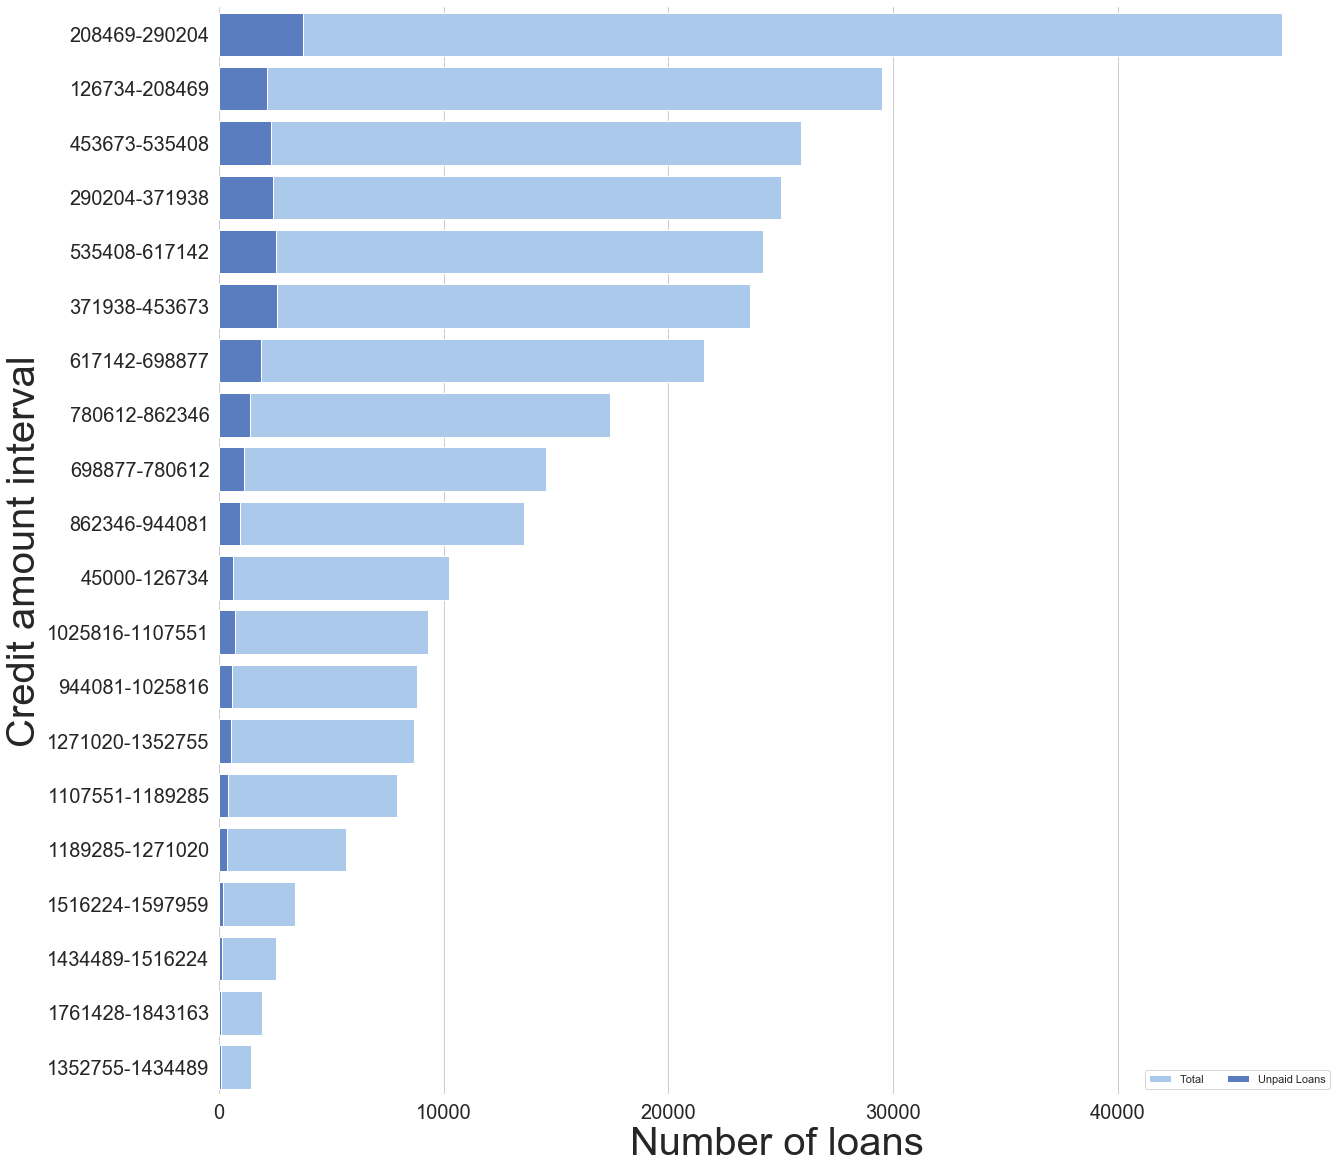

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Load the example car crash dataset
# crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Total Loans", y="AMT_CREDIT Interval", data=topLoanIntervalsAsPerCreditAmount,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('xlabel', fontsize=40)
plt.ylabel('ylabel', fontsize=40)

sns.barplot(x="Unpaid Loans", y="AMT_CREDIT Interval", data=topLoanIntervalsAsPerCreditAmount,
            label="Unpaid Loans", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Credit amount interval", xlabel="Number of loans")
sns.despine(left=True, bottom=True)

In [8]:
topLoanIntervalsAsPerUnpaidPercentage = totalCountAndUnpaidCountPerInterval.sort_values('percentage_unpaid_loans',  
                                                                              ascending=False).head(20)
topLoanIntervalsAsPerUnpaidPercentage

,Total Loans,Unpaid Loans,AMT_CREDIT Interval,percentage_unpaid_loans
29,2,1,2987448-3069183,50.000000
35,23621,2570,371938-453673,10.880149
25,24217,2523,535408-617142,10.418301
18,10,1,3968265-4050000,10.000000
23,24995,2410,290204-371938,9.641928
22,11,1,2905714-2987448,9.090909
6,25886,2313,453673-535408,8.935332
15,21573,1879,617142-698877,8.709962
2,12,1,2578775-2660510,8.333333
33,47314,3748,208469-290204,7.921545


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

Text(0.5, 0, 'xlabel')

Text(0, 0.5, 'ylabel')

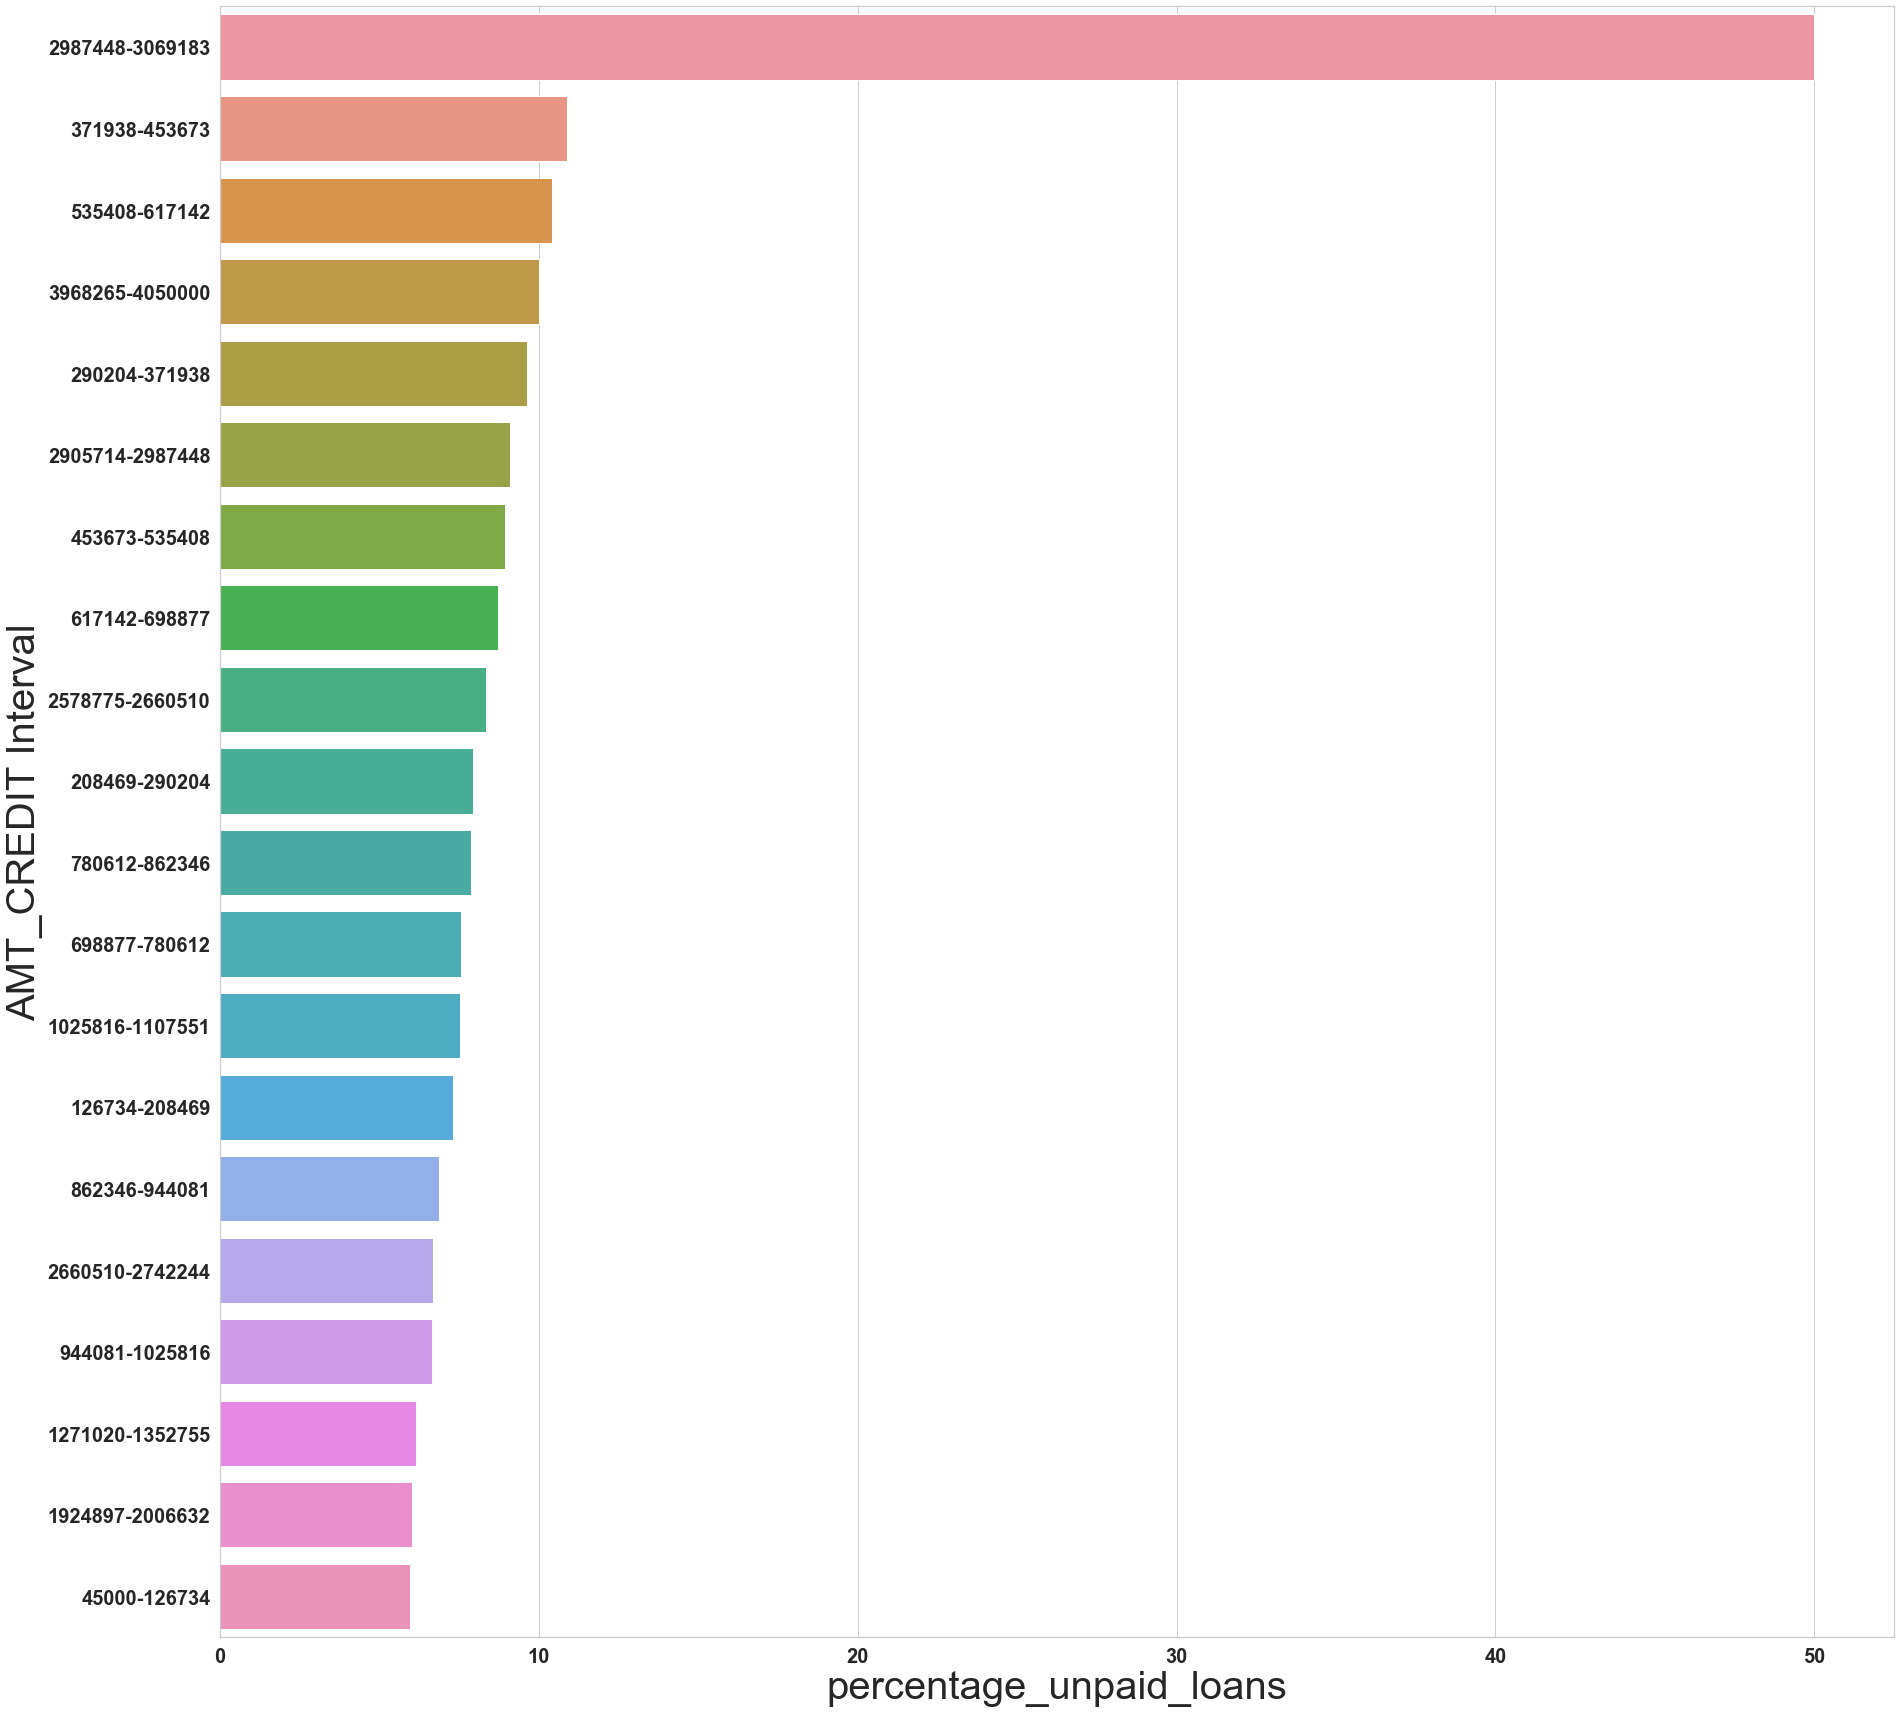

In [9]:
font = {'weight' : 'bold',
        'size'   : 40}

matplotlib.rc('font', **font)
f, axes = plt.subplots(1, 1, figsize=(30, 30))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('xlabel', fontsize=40)
plt.ylabel('ylabel', fontsize=40)
ax = sns.barplot(x="percentage_unpaid_loans", y="AMT_CREDIT Interval", data=topLoanIntervalsAsPerUnpaidPercentage, 
                 ax=axes)